### part 2 : meteorological data : dimensionality reduction and visualization

A meteorological station has gathered 800 data samples in dimension 6, thanks to 6 sensors. The operators of the station would like to predict the risk of a tempest the next day, but first, they need to reduce the dimensionality of the data, in order to apply a supervised learning algorithm on the reduced data.


The data are stored in the **exercise_2** folder :

— **data.npy** contains the raw data

— **labels.npy** contains the results for each sample : 1 if there is a tempest, 0 otherwise.


Perform a dimensionality reduction of the data, to a dimension of 2 and 3 and plot these reductions onto scatter plots in dimension 2 and 3 as well, coloring the projected samples according to the label of the original sample.


Which dimension, between 2 and 3, seems to allow to predict the label based on the projected components only ?


You may use libraries such as scikit-learn in order to implement your dimensionality reduction method, that you are free to choose (linear or non linear). One of the methods that we have seen during the class works well, with a well chosen output dimension. You are encouraged to try at least one other dimensionality reduction method, and if the results is not as good as the previous method, to present them shorty in your report as well

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Load data and labels

In [2]:
data = np.load('data.npy')
labels = np.load('labels.npy')

### Dimensionality reduction from a tensor 6 to a tensor 2 and 3

For the dimensionality reduction, we will use the PCA method from the sklearn library.

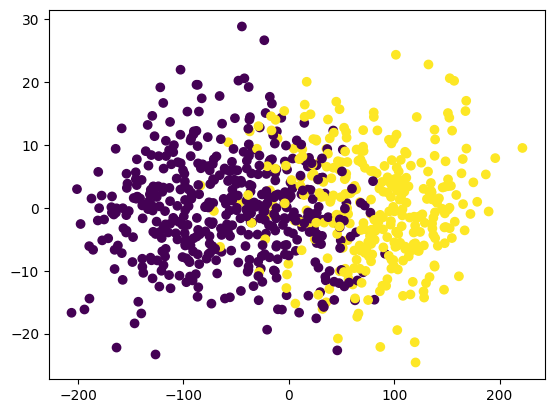

In [3]:
# Dimensionality reduction to a 2D Tensor

from sklearn.decomposition import PCA

pca2D = PCA(n_components=2)
data_pca2D = pca2D.fit_transform(data)

plt.scatter(data_pca2D[:, 0], data_pca2D[:, 1], c=labels)

plt.show()



In [4]:
import plotly.express as px

pca3D = PCA(n_components=3)
data_pca3D = pca3D.fit_transform(data)

fig = px.scatter_3d(data_pca3D, x=0, y=1, z=2, color=labels)

fig.show()

# Conclusion

With the PCA method, we can see that the 3D tensor is better than the 2D tensor. Indeed, the 3D tensor allows to separate the two classes with a plane, while the 2D tensor is not able to separate the two classes with a line.